In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

It is highly recommended to read the documentation before implementing any alogorithm.

LINEAR REGRESSION : 
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html <br>
LOGISTIC REGRESSION :
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html<br>
SVM REGRESSOR :
http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html<br>
SVM CLASSIFIER :
http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html<br>
DECISION TREE CLASSIFIER :
https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html<br>
DECISION TREE Regressor :
https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html<br>
RANDOM FOREST CLASSIFIER :
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html<br>
RANDOM FOREST CLASSIFIER :
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html<br>

METRICS:
R2_SCORE : http://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html<br>
MSE : http://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html<br>
MAE : http://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html<br>
Confusion Matrix : https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html<br>

WRITE THE CODE FOR IMPORTING THE DATA

In [74]:
#WRITE CODE HERE IMPORT THE DATA AS 'data'
data=pd.read_csv('WEEK4.csv')

ONE HOT ENCODING THE COLOR COLUMN AND THEN DROPPING THE COLOR COLUMN

In [75]:
#ONE HOT ENCODING THE COLOR COLUMN
data = pd.concat([data,pd.get_dummies(data['color']).drop('white',axis=1)],axis = 1)
data = data.drop('color',axis = 1)

In [76]:
# VIEWING THE DATA ONCE
data.head()

,price,year,mileage,AGE_IN_YEARS,chevrolet,dodge,gmc,jeep,nissan,salvage insurance,...,Goa,MP,Maharashtra,UP,black,blue,gray,no_color,red,silver
0,2899,2011,190552.0,3,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,5350,2018,39590.0,2,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
2,25000,2014,64146.0,2,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
3,27700,2018,6654.0,3,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
4,5700,2018,45561.0,1,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


WE USE THE train_test_split_function TO SPLIT THE DATA INTO TRAIN AND TEST <br>
HERE WE IMPORT IT FROM SKLEARN

In [77]:
from sklearn.model_selection import train_test_split as tts

LET US LOOK AT THE PRICES DISTRIBUTION

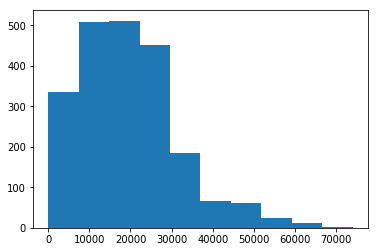

In [78]:
plt.hist(data['price']);

IT IS LEFT-SKEWED, WE HAVE LEARNT HOW TO HANDLE SKEWED DATA<br>
We will either use log transform or sqrt transform

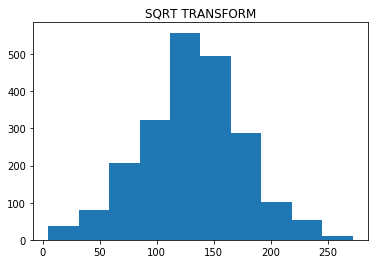

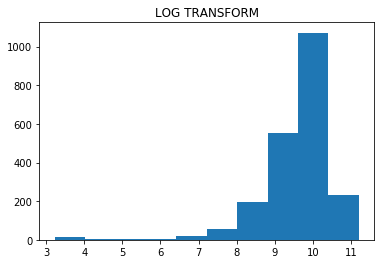

In [79]:
#WE HAVE WRITTEN THE CODE FOR PLOTTING THE HISTOGRAM FOR THE LOG-TRANSFORMED PRICE COLUMN AND SQRT TRANSFORMED SQRT COLUMN.
plt.hist(np.sqrt(data['price']));
plt.title('SQRT TRANSFORM');
plt.show()
plt.hist(np.log(data['price']));
plt.title('LOG TRANSFORM');
plt.show()

CLEARLY SQRT TRANSFORM IS BETTER

In [80]:
#WE CONVERT PRICES TO THEIR SQRT AND ROUND OFF DECIMALS TO TWO
data['price'] = round(np.sqrt(data['price']),2)

In [81]:
# HERE WE SPLIT DATA INTO TRAIN TEST SPLIT
X_train,X_test,y_train,y_test = tts(data.drop('price',axis = 1),data['price'],test_size = 0.2,random_state = 1)

In [82]:
#LET US PRINT THE SHAPES
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

print('\nExpected shapes')
print((1722, 25))
print((431, 25))
print((1722,))
print((431,))
print('\nVerify if they are matching')

(1722, 25)
(431, 25)
(1722,)
(431,)

Expected shapes
(1722, 25)
(431, 25)
(1722,)
(431,)

Verify if they are matching


NOW <br>
LET US APPLY LINEAR REGRESSION ON THE DATA, THIS TIME WE WILL IMPORT IT FROM SKLEARN <br>


In [83]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
# INITIALIZE LINEAR REGRESSION WITH ALL DEFAULT PARAMETERS
Linreg = LinearRegression()
Linreg.fit(X_train,y_train)

# FIND TEST ERROR AND TRAIN ERROR WITH THE METRICS IMPORTED ABOVE
# NOTE THAT WE HAVE SQUARED BACK THE VALUES AS WE ARE PREDICTING PRICES NOT THEIR SQUARE ROOT 
print("Linear Regression Training R2 score is " + str(r2_score(np.square(y_train),np.square(Linreg.predict(X_train)))))
print("Linear Regression Testing R2 score is " + str(r2_score(np.square(y_test),np.square(Linreg.predict(X_test)))))

# WRITE CODE FOR MEAN SQUARE ERROR AND MEAN

# Start code
#mean_score error
print("Linear Regression Training mean_square_error is " + str(mean_squared_error(np.square(y_train),np.square(Linreg.predict(X_train)))))
print("Linear Regression Testing mean_square_error is " + str(mean_squared_error(np.square(y_test),np.square(Linreg.predict(X_test)))))
#mean absolute error
print("Linear Regression Training mean_absolute_error is " + str(mean_absolute_error(np.square(y_train),np.square(Linreg.predict(X_train)))))
print("Linear Regression Testing mean_absolute_error is " + str(mean_absolute_error(np.square(y_test),np.square(Linreg.predict(X_test)))))


# End code

print("\n")
print("The correct values are :")


print('Linear Regression Training R2 score is 0.3577935806672855')
print('Linear Regression Testing R2 score is 0.33405970134102436')
print('Linear Regression Training mean_square_error is 90997459.24038002')
print('Linear Regression Testing mean_square_error is 93998879.06677869')
print('Linear Regression Training mean_absolute_error is 6864.980505017769')
print('Linear Regression Testing mean_absolute_error is 6926.987292556893')

print("\nPlease verify if you have got the same values")

Linear Regression Training R2 score is 0.3577935806672947
Linear Regression Testing R2 score is 0.3340597013410348
Linear Regression Training mean_square_error is 90997459.24037871
Linear Regression Testing mean_square_error is 93998879.06677723
Linear Regression Training mean_absolute_error is 6864.98050501778
Linear Regression Testing mean_absolute_error is 6926.987292556907


The correct values are :
Linear Regression Training R2 score is 0.3577935806672855
Linear Regression Testing R2 score is 0.33405970134102436
Linear Regression Training mean_square_error is 90997459.24038002
Linear Regression Testing mean_square_error is 93998879.06677869
Linear Regression Training mean_absolute_error is 6864.980505017769
Linear Regression Testing mean_absolute_error is 6926.987292556893

Please verify if you have got the same values


<br>
NOW LET US WRITE THE SKLEARN IMPLEMENTATION OF DECISION TREE IN REGRESSION <br>

In [86]:
from sklearn.tree import DecisionTreeRegressor

# INITIALIZE THE DECISION TREE WITH criterion as mse, max depth as 7 and Random State as 1
# USE THE FIT METHOD TO FIND THE R2_SCORE, MSE, MAE For training as well as testing data


# START CODE
clf = DecisionTreeRegressor(criterion="mse", max_depth=7,random_state=1)
clf.fit(X_train,y_train)
print("Decision Tree Training R2 score is " + str(r2_score(np.square(y_train),np.square(clf.predict(X_train)))))
print("Decision Tree Testing R2 score is " + str(r2_score(np.square(y_test),np.square(clf.predict(X_test)))))

# WRITE CODE FOR MEAN SQUARE ERROR AND MEAN

# Start code
#mean_score error
print("Decision Tree Training mean_square_error is " + str(mean_squared_error(np.square(y_train),np.square(clf.predict(X_train)))))
print("Decision Tree Testing mean_square_error is " + str(mean_squared_error(np.square(y_test),np.square(clf.predict(X_test)))))
#mean absolute error
print("Decision Tree Training mean_absolute_error is " + str(mean_absolute_error(np.square(y_train),np.square(clf.predict(X_train)))))
print("Decision Tree Testing mean_absolute_error is " + str(mean_absolute_error(np.square(y_test),np.square(clf.predict(X_test)))))



# END CODE

Decision Tree Training R2 score is 0.422869230755335
Decision Tree Testing R2 score is 0.36145560633416207
Decision Tree Training mean_square_error is 81776562.90835412
Decision Tree Testing mean_square_error is 90131889.2396716
Decision Tree Training mean_absolute_error is 6266.244817595775
Decision Tree Testing mean_absolute_error is 6846.025816839579


<br>
NOW LET US WRITE THE SKLEARN IMPLEMENTATION OF SVM IN REGRESSION <br>

In [18]:
from sklearn.svm import SVR
# INITIALIZE THE SVM WITH kernel as 'poly', maximum number of iterations as 3000, degree as 2, C(regularization parameter) as 0.1 
# FIT THE DATA using FIT METHOD
# Calculate the R2_score, mse, mae for training data as well as testing data.

# START CODE
clf = SVR(kernel='poly',C=0.1,max_iter=3000,degree=2) # poly Kernel
clf.fit(X_train,y_train)
print("SVM Training R2 score is " + str(r2_score(np.square(y_train),np.square(clf.predict(X_train)))))
print("SVM Testing R2 score is " + str(r2_score(np.square(y_test),np.square(clf.predict(X_test)))))

# WRITE CODE FOR MEAN SQUARE ERROR AND MEAN

# Start code
#mean_score error
print("SVM Training mean_square_error is " + str(mean_squared_error(np.square(y_train),np.square(clf.predict(X_train)))))
print("SVM Testing mean_square_error is " + str(mean_squared_error(np.square(y_test),np.square(clf.predict(X_test)))))
#mean absolute error
print("SVM Training mean_absolute_error is " + str(mean_absolute_error(np.square(y_train),np.square(clf.predict(X_train)))))
print("SVM Testing mean_absolute_error is " + str(mean_absolute_error(np.square(y_test),np.square(clf.predict(X_test)))))


# END CODE

SVM Training R2 score is -1.2668220735156703e+30
SVM Testing R2 score is -1.2792018213442112e+27
SVM Training mean_square_error is 1.7950239444715493e+38
SVM Testing mean_square_error is 1.8056203769117988e+35
SVM Training mean_absolute_error is 7.116532563535954e+17
SVM Testing mean_absolute_error is 3.513267417707484e+17


/home/radib/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/radib/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


YOU MIGHT SEE WORSE VALUES WHEN COMPARED TO LINEAR REGRESSION OR DECISION TREE AS THE DATA IS UNSCALED AND SVM REQUIRES MUCH MORE PREPROCESSING AND TUNING...BUT WE WON'T DO THAT HERE AS OUR AIM WAS JUST TO IMPLEMENT THE MODELS

<br>
NOW LET US WRITE THE SKLEARN IMPLEMENTATION OF Random Forest IN REGRESSION <br>

In [87]:
from sklearn.ensemble import RandomForestRegressor
# INITIALIZE THE Random Forest Regressor WITH no: of trees as 200, max_depth as 9, n_jobs as -1(read documentation for more details) and random state as 1 

# FIT THE DATA using FIT METHOD
# Calculate the R2_score, mse, mae for training data as well as testing data.

# START CODE
clf = RandomForestRegressor(n_estimators=200,max_depth=9,n_jobs=-1,random_state=1) # poly Kernel
clf.fit(X_train,y_train)
print("RandomForest Training R2 score is " + str(r2_score(np.square(y_train),np.square(clf.predict(X_train)))))
print("RandoemForest Testing R2 score is " + str(r2_score(np.square(y_test),np.square(clf.predict(X_test)))))

print("RandomForest Training mean_square_error is " + str(mean_squared_error(np.square(y_train),np.square(clf.predict(X_train)))))
print("RandomForest Testing mean_square_error is " + str(mean_squared_error(np.square(y_test),np.square(clf.predict(X_test)))))
#mean absolute error
print("RandomForest Training mean_absolute_error is " + str(mean_absolute_error(np.square(y_train),np.square(clf.predict(X_train)))))
print("RandomForest Testing mean_absolute_error is " + str(mean_absolute_error(np.square(y_test),np.square(clf.predict(X_test)))))


# END CODE

RandomForest Training R2 score is 0.5524364393379153
RandoemForest Testing R2 score is 0.3997413290406361
RandomForest Training mean_square_error is 63417533.12143005
RandomForest Testing mean_square_error is 84727778.65210524
RandomForest Training mean_absolute_error is 5528.669046457424
RandomForest Testing mean_absolute_error is 6695.668840563838


NOW FOR CLASSIFICATION MODELS WE NEED TO CONVERT THE TARGET VARIABLE INTO DIFFERENT CLASSES

In [88]:
# WE FIND THE MEDIAN
np.square(data['price']).describe()

count     2153.000000
mean     19298.257905
std      11904.254199
min         25.000000
25%      10799.366400
50%      17300.140900
75%      26001.562500
max      74000.320900
Name: price, dtype: float64

WE WILL DO BINARY CLASSIFICATION AND DIVIDE THE DATA EQUALLY(ALMOST) INTO 1's AND 0's <br>
WE HAVE CHOSEN THRESHOLD AT price = 20000

In [89]:
data.loc[np.square(data['price']) < 20000,'price'] = 0
data.loc[np.square(data['price']) >= 20000,'price'] = 1


In [90]:
data.head()

,price,year,mileage,AGE_IN_YEARS,chevrolet,dodge,gmc,jeep,nissan,salvage insurance,...,Goa,MP,Maharashtra,UP,black,blue,gray,no_color,red,silver
0,0.0,2011,190552.0,3,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,0.0,2018,39590.0,2,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
2,1.0,2014,64146.0,2,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
3,1.0,2018,6654.0,3,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
4,0.0,2018,45561.0,1,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [91]:
X_train,X_test,y_train,y_test = tts(data.drop('price',axis = 1),data['price'],test_size = 0.2,random_state = 1)

In [92]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

In [94]:
# INITIALIZE Logistic Regression BY TAKING solver as 'lbfgs', max_iter as 2000, C as 0.5 and penalty as 'l2' and random_state as 1 
# FIT Logistic Regression ON TRAINING DATA
# WRITE CODE HERE AND FIND THE TPR, FPR, SENSTIVITY, SPECIFICITY, ACCURACY FOR LOGISTIC REGRESSION
# USE THE IMPORTED CONFUSION MATRIX

# START CODE
logreg = LogisticRegression(solver='lbfgs',max_iter=2000,C=0.5, penalty='l2',random_state=1)
logreg.fit(X_train, y_train)
#training 
print("training results")
y_pred=logreg.predict(X_train)
tn, fp, fn, tp = confusion_matrix(np.square(y_train), np.square(y_pred)).ravel()
TPR=tp/(tp+fn)#sensitivity
FPR=1-TPR
TNR=tn/(tn+fp)#specivity
FNR=1-TNR
print("TPR",TPR)
print("FPR",FPR)
print("TNR",TNR)
print("FNR",FNR)

#testing 
print("testing results")
y_pred=logreg.predict(X_test)
tn, fp, fn, tp = confusion_matrix(np.square(y_test), np.square(y_pred)).ravel()
TPR=tp/(tp+fn)
FPR=1-TPR
TNR=tn/(tn+fp)
FNR=1-TNR
print("TPR",TPR)
print("FPR",FPR)
print("TNR",TNR)
print("FNR",FNR)

# END CODE

training results
TPR 0.6502115655853314
FPR 0.34978843441466856
TNR 0.771964461994077
FNR 0.22803553800592302
testing results
TPR 0.6542553191489362
FPR 0.3457446808510638
TNR 0.7736625514403292
FNR 0.22633744855967075


In [95]:
# INITIALIZE SVM BY TAKING kernal as 'rbf', max_iter as 1000 and random_state as 1 and gamma as scale
# FIT SVM ON TRAINING DATA
# WRITE CODE HERE AND FIND THE TPR, FPR, SENSTIVITY, SPECIFICITY, ACCURACY FOR SVM
# USE THE IMPORTED CONFUSION MATRIX
from sklearn.metrics import accuracy_score
# START CODE
svc = SVC(kernel='rbf',max_iter=1000,random_state=1, gamma='scale')
svc.fit(X_train, y_train)
#training 
print("training results")
y_pred=svc.predict(X_train)
tn, fp, fn, tp = confusion_matrix(np.square(y_train), np.square(y_pred)).ravel()
TPR=tp/(tp+fn)#sensitiviy
FPR=1-TPR
TNR=tn/(tn+fp)
FNR=1-TNR
print("TPR",TPR)
print("FPR",FPR)
print("TNR",TNR)
print("FNR",FNR)

#testing 
print("testing results")
y_pred=svc.predict(X_test)
tn, fp, fn, tp = confusion_matrix(np.square(y_test), np.square(y_pred)).ravel()
TPR=tp/(tp+fn)
FPR=1-TPR
TNR=tn/(tn+fp)
FNR=1-TNR
print("TPR",TPR)
print("FPR",FPR)
print("TNR",TNR)
print("FNR",FNR)
print("accuracy",accuracy_score(y_test,y_pred))

# END CODE


training results
TPR 0.5063469675599436
FPR 0.4936530324400564
TNR 0.8509378084896347
FNR 0.14906219151036526
testing results
TPR 0.5372340425531915
FPR 0.4627659574468085
TNR 0.8600823045267489
FNR 0.13991769547325106
accuracy 0.7192575406032483


In [96]:

# INITIALIZE DECISION TREE CLASSIFIER BY TAKING criterion as 'gini' , max_depth as 3, and random_state as 1
# FIT Decision Tree ON TRAINING DATA
# WRITE CODE HERE AND FIND THE TPR, FPR, SENSTIVITY, SPECIFICITY, ACCURACY FOR Decision Tree
# USE THE IMPORTED CONFUSION MATRIX

# START CODE
dt = DecisionTreeClassifier(criterion='gini',max_depth=3,random_state=1)
dt.fit(X_train, y_train)
#training 
print("training results")
y_pred=dt.predict(X_train)
tn, fp, fn, tp = confusion_matrix(np.square(y_train), np.square(y_pred)).ravel()
TPR=tp/(tp+fn)#sensitiviy
FPR=1-TPR
TNR=tn/(tn+fp)
FNR=1-TNR
print("TPR",TPR)
print("FPR",FPR)
print("TNR",TNR)
print("FNR",FNR)

#testing 
print("testing results")
y_pred=dt.predict(X_test)
tn, fp, fn, tp = confusion_matrix(np.square(y_test), np.square(y_pred)).ravel()
TPR=tp/(tp+fn)
FPR=1-TPR
TNR=tn/(tn+fp)
FNR=1-TNR
print("TPR",TPR)
print("FPR",FPR)
print("TNR",TNR)
print("FNR",FNR)
print("accuracy",accuracy_score(y_test,y_pred))

# END CODE

training results
TPR 0.5430183356840621
FPR 0.4569816643159379
TNR 0.8775913129318855
FNR 0.12240868706811447
testing results
TPR 0.5638297872340425
FPR 0.43617021276595747
TNR 0.8847736625514403
FNR 0.1152263374485597
accuracy 0.7447795823665894


In [97]:
# INITIALIZE RANDOM FOREST CLASSIFIER BY TAKING no:of trees as 100 , max_depth as 3,criterion as 'gini' and random_state as 1 
# FIT RANDOM FOREST ON TRAINING DATA
# WRITE CODE HERE AND FIND THE TPR, FPR, SENSTIVITY, SPECIFICITY, ACCURACY FOR Random Forest
# USE THE IMPORTED CONFUSION MATRIX

# START CODE
dt = RandomForestClassifier(n_estimators=100,max_depth=3,criterion='gini',random_state=1)
dt.fit(X_train, y_train)
#training 
print("training results")
y_pred=dt.predict(X_train)
tn, fp, fn, tp = confusion_matrix(np.square(y_train), np.square(y_pred)).ravel()
TPR=tp/(tp+fn)#sensitiviy
FPR=1-TPR
TNR=tn/(tn+fp)
FNR=1-TNR
print("TPR",TPR)
print("FPR",FPR)
print("TNR",TNR)
print("FNR",FNR)

#testing 
print("testing results")
y_pred=dt.predict(X_test)
tn, fp, fn, tp = confusion_matrix(np.square(y_test), np.square(y_pred)).ravel()
TPR=tp/(tp+fn)
FPR=1-TPR
TNR=tn/(tn+fp)
FNR=1-TNR
print("TPR",TPR)
print("FPR",FPR)
print("TNR",TNR)
print("FNR",FNR)
print("accuracy",accuracy_score(y_test,y_pred))

# END CODE

training results
TPR 0.5444287729196051
FPR 0.4555712270803949
TNR 0.8795656465942744
FNR 0.12043435340572561
testing results
TPR 0.5638297872340425
FPR 0.43617021276595747
TNR 0.8806584362139918
FNR 0.11934156378600824
accuracy 0.7424593967517401
